In [1]:
# Here I check representativity of the data by training a simple feedforward NN 
# input -- particle features
# output -- whether or not this set of features correspond to a particle coming from the decay of a beauty or charm heavy hadron

In [2]:
!pip install uproot

In [3]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras import initializers
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from matplotlib import pyplot as plt
from IPython.display import clear_output
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [5]:
particles_file = uproot.open("/data/physics/dfei/andrii/particles_data.root")

In [6]:
particles_tree = particles_file['Particles']

In [7]:
particles_tree.keys()

['EventNumber',
 'ExpandedEventNumber',
 'ExpandedParticleIndex',
 'ExpandedPrimaryHeavyHadronIndex',
 'FromPrimaryHeavyHadron',
 'MotherId',
 'MotherIndex',
 'NumVisDaugh',
 'ParticleIndex',
 'ParticleType',
 'PrimaryHeavyHadronIndex',
 'Prob_K',
 'Prob_e',
 'Prob_gamma',
 'Prob_mu',
 'Prob_p',
 'Prob_pi',
 'Prob_pi0',
 'TriggerKey',
 'associated_ip',
 'associated_ip_reco',
 'associated_xPV',
 'associated_xPV_reco',
 'associated_yPV',
 'associated_yPV_reco',
 'associated_zPV',
 'associated_zPV_reco',
 'charge',
 'gammactau',
 'id',
 'inGeomAcc',
 'ip',
 'ip_reco',
 'isCharged',
 'isFinal',
 'isbhadron',
 'ischadron',
 'pt',
 'pt_reco',
 'px',
 'px_reco',
 'py',
 'py_reco',
 'pz',
 'pz_reco',
 'xPV',
 'xPV_reco',
 'xProd',
 'xProd_reco',
 'yPV',
 'yPV_reco',
 'yProd',
 'yProd_reco',
 'zPV',
 'zPV_reco',
 'zProd',
 'zProd_reco']

In [8]:
relavant_particles_keys = ['ExpandedEventNumber',
                          'ExpandedParticleIndex',
                          'ExpandedPrimaryHeavyHadronIndex',
                          'FromPrimaryHeavyHadron',
                          'ParticleType',
                          'associated_ip_reco',
                          'associated_xPV_reco',
                          'associated_yPV_reco',
                          'associated_zPV_reco',
                          'charge',
                          'inGeomAcc',
                          #'ip_reco',
                          'isCharged',
                          'pt_reco',
                          'px_reco',
                          'py_reco',
                          'pz_reco',
                          #'xPV_reco',
                          'xProd_reco',
                          #'yPV_reco',
                          'yProd_reco',
                          #'zPV_reco',
                          'zProd_reco']

In [9]:
df = particles_tree.arrays(relavant_particles_keys, library='pd')

In [10]:
df

,ExpandedEventNumber,ExpandedParticleIndex,ExpandedPrimaryHeavyHadronIndex,FromPrimaryHeavyHadron,ParticleType,associated_ip_reco,associated_xPV_reco,associated_yPV_reco,associated_zPV_reco,charge,inGeomAcc,isCharged,pt_reco,px_reco,py_reco,pz_reco,xProd_reco,yProd_reco,zProd_reco
0,0.0,1057.0,-1.0,0.0,2.0,-1.000000,-1.000000,-1.000000,-1.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1106.0,-1.0,0.0,0.0,0.015194,-0.078272,-0.006414,-29.304338,-1.0,1.0,1.0,0.286947,-0.153205,-0.242625,2.750225,-0.642510,-0.880182,-19.230768
2,0.0,1110.0,-1.0,0.0,0.0,0.006571,-0.078272,-0.006414,-29.304338,1.0,1.0,1.0,0.576406,-0.555643,-0.153313,13.076964,-0.511701,-0.120768,-19.230768
3,0.0,1111.0,-1.0,0.0,0.0,0.010698,-0.078272,-0.006414,-29.304338,-1.0,1.0,1.0,0.922732,-0.865247,0.320597,6.068925,-1.524306,0.530222,-19.230768
4,0.0,1112.0,-1.0,0.0,0.0,0.010318,-0.078272,-0.006414,-29.304338,1.0,1.0,1.0,0.253314,-0.246892,0.056676,1.878958,-1.392859,0.292333,-19.230768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374328,6161.0,2430.0,-1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.657934,-0.611031,0.243963,3.661947,0.000000,0.000000,0.000000
1374329,6161.0,2431.0,-1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.559823,-0.523263,-0.198992,2.484762,0.000000,0.000000,0.000000
1374330,6161.0,2444.0,-1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.313306,-0.313267,0.004922,1.603106,0.000000,0.000000,0.000000
1374331,6161.0,2445.0,-1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.416930,-0.082793,0.408627,2.115970,0.000000,0.000000,0.000000


In [11]:
df = df.sample(frac=1)

In [12]:
df_X = df.loc[:, ~df.columns.isin(['FromPrimaryHeavyHadron', 'ExpandedEventNumber', 'ExpandedParticleIndex', 'ExpandedPrimaryHeavyHadronIndex', 'ParticleType', 'inGeomAcc'])]
df_Y = df.loc[:, df.columns == 'FromPrimaryHeavyHadron']

In [13]:
df_X

,associated_ip_reco,associated_xPV_reco,associated_yPV_reco,associated_zPV_reco,charge,isCharged,pt_reco,px_reco,py_reco,pz_reco,xProd_reco,yProd_reco,zProd_reco
920532,0.481668,-0.023380,-0.052705,226.635254,-1.0,1.0,0.190728,0.186546,0.039719,1.200032,3.681720,0.244509,250.000000
90163,0.020778,0.089322,-0.048565,127.053909,-1.0,1.0,0.674683,0.446255,0.506017,12.294528,0.383190,0.270135,134.615387
352888,0.026124,0.025430,0.040279,-34.232590,-1.0,1.0,0.237231,0.202796,0.123095,1.792206,1.728837,1.096222,-19.230768
469560,0.018120,0.083827,0.009178,56.699604,1.0,1.0,0.256249,-0.195939,0.165140,1.299171,-0.055155,0.149961,57.692307
632106,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.734149,-0.030340,1.733884,11.622204,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102005,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.134392,0.048899,-0.125180,2.314634,0.000000,0.000000,0.000000
1191687,0.006987,0.043047,0.027290,40.392944,1.0,1.0,0.468283,0.271501,0.381545,4.804132,1.019906,1.408168,57.692307
458733,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.189894,-0.090675,-0.166847,2.746703,0.000000,0.000000,0.000000
269305,0.012626,0.020185,0.037212,-4.776522,1.0,1.0,0.589718,0.354748,0.471085,8.491742,0.207178,0.303653,-0.000000


In [14]:
df_Y

,FromPrimaryHeavyHadron
920532,1.0
90163,0.0
352888,0.0
469560,0.0
632106,0.0
...,...
102005,0.0
1191687,0.0
458733,0.0
269305,0.0


In [15]:
# 50,000 for val_set
# 50,000 for test_set

X_train = df_X.iloc[:1274333, :]
Y_train = df_Y.iloc[:1274333, :]
X_val = df_X.iloc[1274333:1324333, :]
Y_val = df_Y.iloc[1274333:1324333, :]
X_test = df_X.iloc[1324333:, :]
Y_test = df_Y.iloc[1324333:, :]

X_train = X_train.values
Y_train = Y_train.values
X_val = X_val.values
Y_val = Y_val.values
X_test = X_test.values
Y_test = Y_test.values

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [17]:
mean = 0.0
ki0 = tf.keras.initializers.RandomNormal(mean=mean,stddev=0.1)
ki1 = tf.keras.initializers.RandomNormal(mean=mean,stddev=0.05)
ki2 = tf.keras.initializers.RandomNormal(mean=mean,stddev=0.05)
ki3 = tf.keras.initializers.RandomNormal(mean=mean,stddev=0.05)
ki4 = tf.keras.initializers.RandomNormal(mean=mean,stddev=0.05)
ki5 = tf.keras.initializers.RandomNormal(mean=mean,stddev=0.001)

model = Sequential([
    Dense(300, activation='tanh', input_shape=(13,), name='h0', kernel_initializer = ki0),
    Dense(300, activation='tanh', name='h1', kernel_initializer = ki1),
    Dense(300, activation='tanh', name='h2', kernel_initializer = ki2),
    Dense(300, activation='tanh',  name='h3', kernel_initializer = ki3),
    Dense(300, activation='tanh',  name='h4', kernel_initializer = ki4),
    Dense(1, activation='sigmoid', name='y', kernel_initializer = ki5),
])

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h0 (Dense)                  (None, 300)               4200      
                                                                 
 h1 (Dense)                  (None, 300)               90300     
                                                                 
 h2 (Dense)                  (None, 300)               90300     
                                                                 
 h3 (Dense)                  (None, 300)               90300     
                                                                 
 h4 (Dense)                  (None, 300)               90300     
                                                                 
 y (Dense)                   (None, 1)                 301       
                                                                 
Total params: 365,701
Trainable params: 365,701
Non-trai

2023-05-25 11:19:46.372897: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 11:19:46.373775: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 


In [18]:
class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

In [21]:
my_callbacks = [
    PlotLearning(),
    tf.keras.callbacks.ModelCheckpoint(filepath='/home/jonas/Documents/physics/lhcb/dfei/irishep/data/IRIS-HEP_DFEI/checkpoints/5hl_is_FromPrimaryHeavyHadron_particles_data_only/9_loss.cktp', 
                                       save_weights_only=True,
                                       monitor='loss',
                                       mode='min',
                                       save_best_only=True),
    tf.keras.callbacks.ModelCheckpoint(filepath='/home/jonas/Documents/physics/lhcb/dfei/irishep/data/IRIS-HEP_DFEI/checkpoints/5hl_is_FromPrimaryHeavyHadron_particles_data_only/9_valloss.cktp', 
                                       save_weights_only=True,
                                       monitor='val_loss',
                                       mode='min',
                                       save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', verbose=1, min_lr=1e-6, patience=20, min_delta=0.001)
   # tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=10)
]

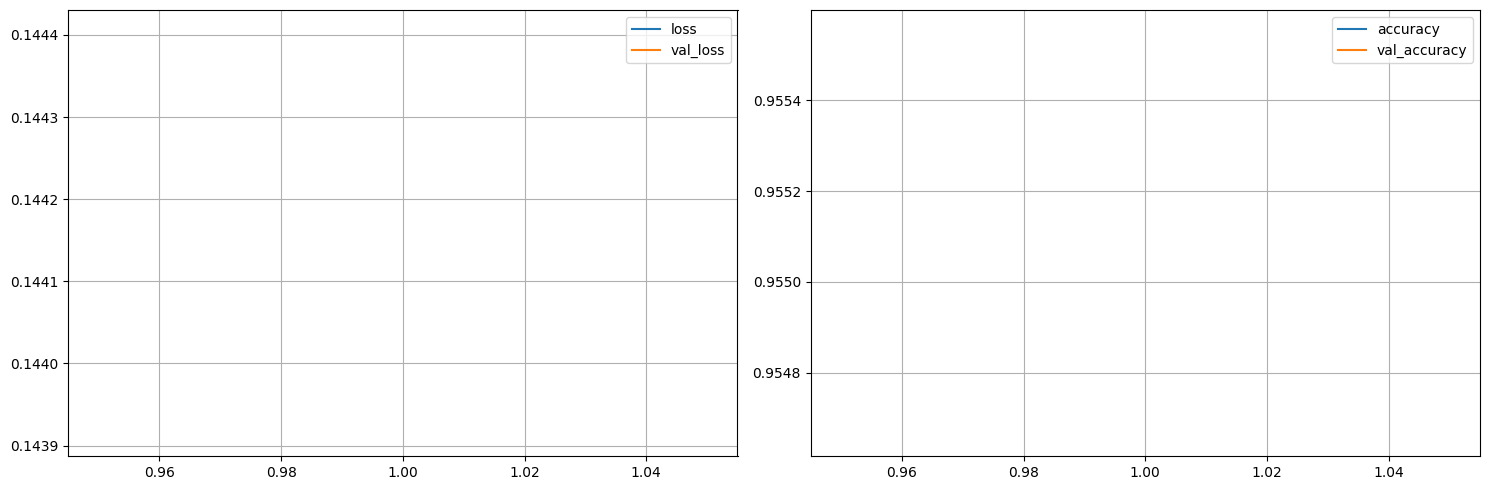

9956/9956 [==============================] - 166s 17ms/step - loss: 0.1439 - accuracy: 0.9556 - val_loss: 0.1444 - val_accuracy: 0.9547 - lr: 0.0010
Epoch 2/20
2674/9956 [=======>......................] - ETA: 1:58 - loss: 0.1406 - accuracy: 0.9572

KeyboardInterrupt: 

In [22]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=20, callbacks=my_callbacks,
          validation_data=(X_val, Y_val))

In [ ]:
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()